<a href="https://colab.research.google.com/github/Hirithik-ds/Google-Playstore-Analysis/blob/main/GOOGLE_PLAYSTORE_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Summary
The purpose of this project is to perform exploratory data analysis (EDA) on Google Play Store application data.
Various visualization libraries will be used to uncover relationships between different features.
This notebook will explain how to perform EDA and data visualization for the Google Play Store application dataset.

The dataset includes various properties of applications on the Google Play Store.
The dataset consists of 10,841 rows and each row represents an application.
There are 13 different columns in total, as outlined below:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [ ]:
# Warning Settings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

Loading & Reading Dataset

In [ ]:
# Loading & Reading Dataset
df_original = pd.read_csv('/content/google_play_store_dataset.csv')

# Making a copy
df = df_original.copy()

In [ ]:

df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Initial Exploration and Analyzing Values

In [ ]:
pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Not-Null,Unique,Duplicated
App,10841,13,140933,0,10841,9660,483
Category,10841,13,140933,0,10841,34,483
Rating,10841,13,140933,1474,9367,40,483
Reviews,10841,13,140933,0,10841,6002,483
Size,10841,13,140933,0,10841,462,483
Installs,10841,13,140933,0,10841,22,483
Type,10841,13,140933,1,10840,3,483
Price,10841,13,140933,0,10841,93,483
Content Rating,10841,13,140933,1,10840,6,483
Genres,10841,13,140933,0,10841,120,483


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df.shape

(10841, 13)

In [ ]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [ ]:
round(df.describe(),2)

,Rating
count,9367.00
mean,4.19
std,0.54
min,1.00
25%,4.00
50%,4.30
75%,4.50
max,19.00


In [ ]:
df.describe(include= "object")

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


Organizing and Manipulating Data

In [ ]:
# Viewing column names with List Compherension
[i for i in df.columns]

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [ ]:
# Reformats column names by replacing spaces within column names with underscores.
df.columns = df.columns.str.replace(" ","_")

In [ ]:
[i for i in df.columns]

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content_Rating',
 'Genres',
 'Last_Updated',
 'Current_Ver',
 'Android_Ver']

Dropping Duplicates

In [ ]:
df.duplicated().sum()

483

In [ ]:
# Dropping duplicates
df = df.drop_duplicates()

Null Values Detection

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


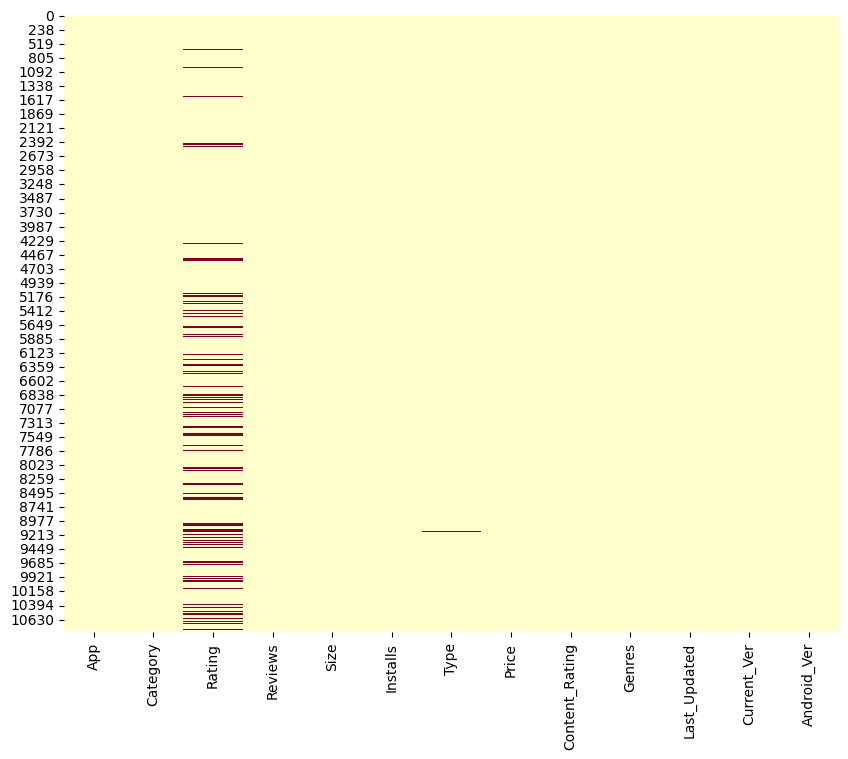

In [ ]:
# Seaborn Heatmap for Missing Value Detection
plt.figure(figsize=(10, 8))

sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd');

In [ ]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1465
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content_Rating,1
Genres,0


In [ ]:
rating_median = df["Rating"].median()
rating_median

4.3

In [ ]:
df["Rating"].fillna(rating_median, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
pd.DataFrame({
                'Count':df.shape[0],
                'Column':df.shape[1],
                'Size':df.size,
                'Null':df.isnull().sum(),
                'Null %':df.isnull().mean() * 100,
                'Not-Null':df.notnull().sum(),
                'Unique':df.nunique(),
                'Duplicated':df.duplicated().sum()
})

,Count,Column,Size,Null,Null %,Not-Null,Unique,Duplicated
App,10346,13,134498,0,0.0,10346,9648,0
Category,10346,13,134498,0,0.0,10346,33,0
Rating,10346,13,134498,0,0.0,10346,39,0
Reviews,10346,13,134498,0,0.0,10346,5999,0
Size,10346,13,134498,0,0.0,10346,457,0
Installs,10346,13,134498,0,0.0,10346,20,0
Type,10346,13,134498,0,0.0,10346,2,0
Price,10346,13,134498,0,0.0,10346,92,0
Content_Rating,10346,13,134498,0,0.0,10346,6,0
Genres,10346,13,134498,0,0.0,10346,119,0


 Detailed Explaration and Manipulation on Dataset Features

In [ ]:
df["Reviews"].describe()

,Reviews
count,10346
unique,5999
top,0
freq,591


In [ ]:
df["Reviews"] = df["Reviews"].astype("int64")

In [ ]:
df["Reviews"].describe().round()

,Reviews
count,10346.0
mean,406334.0
std,2698179.0
min,0.0
25%,32.0
50%,1688.0
75%,46598.0
max,78158306.0


 Category

In [ ]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
df['Category'] = df['Category'].str.capitalize().str.replace("_", " ")

In [ ]:
df['Category'].unique()

array(['Art and design', 'Auto and vehicles', 'Beauty',
       'Books and reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food and drink', 'Health and fitness', 'House and home',
       'Libraries and demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel and local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video players', 'News and magazines', 'Maps and navigation'],
      dtype=object)

In [ ]:
df['Size'].nunique()

457

In [ ]:
def convert_to_megabytes(size):
    if isinstance(size, str):
        if 'k' in size:
            return round(float(size.replace('k', '')) / 1024, 2)
        elif 'M' in size:
            return float(size.replace('M', ''))
        else:
            return None  # ‘Varies with device’ or for other values that cannot be converted to numbers
    return None  # For None or NaN

In [ ]:
df['Converted_Size'] = df['Size'].apply(convert_to_megabytes)

In [ ]:
sample_data = df[df['Size'].str.contains('k|M', na=False)]
sample_data[['Size', 'Converted_Size']]

,Size,Converted_Size
0,19M,19.0
1,14M,14.0
2,8.7M,8.7
3,25M,25.0
4,2.8M,2.8
...,...,...
10835,9.6M,9.6
10836,53M,53.0
10837,3.6M,3.6
10838,9.5M,9.5


In [ ]:
size_median = df[df["Converted_Size"]!="Varies with device"]["Converted_Size"].astype(float).median()
size_median

13.0

In [ ]:
df[df["Converted_Size"] != "Varies with device"]["Converted_Size"]

,Converted_Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8
...,...
10836,53.0
10837,3.6
10838,9.5
10839,NaN


In [ ]:
df["Converted_Size"].replace("Varies with device", size_median, inplace=True)

In [ ]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)
#This makes the ‘Converted_Size’ column available for numerical analyses or machine learning models.

In [ ]:
df.Converted_Size = pd.to_numeric(df.Converted_Size)

In [ ]:
df.Converted_Size.head()

,Converted_Size
0,19.0
1,14.0
2,8.7
3,25.0
4,2.8


In [ ]:
df.Converted_Size.describe()

,Converted_Size
count,8821.000000
mean,21.306250
std,22.545817
min,0.010000
25%,4.700000
50%,13.000000
75%,29.000000
max,100.000000


In [ ]:
df.drop("Size", axis=1, inplace=True)

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Installs', 'Type', 'Price',
       'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver', 'Converted_Size'],
      dtype='object')

INSTALLS

In [ ]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [ ]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [ ]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

PRICE

In [ ]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [ ]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

GENRES

In [ ]:
df["Genres"].nunique()

119

In [ ]:
df["Genres"].head(10)

,Genres
0,Art & Design
1,Art & Design;Pretend Play
2,Art & Design
3,Art & Design
4,Art & Design;Creativity
5,Art & Design
6,Art & Design
7,Art & Design
8,Art & Design
9,Art & Design;Creativity


In [ ]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [ ]:
df["Genres"].nunique()

48

In [ ]:
df["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

This output gives the impression that Music and Music & Audio are used in the same sense, so it would be correct to correct them all as Music.

In [ ]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

 Last Updated

In [ ]:
df["Last_Updated"].head()

,Last_Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"


In [ ]:
df["Last_Updated"] = pd.to_datetime(df["Last_Updated"])

In [ ]:
df['Year'] = df['Last_Updated'].dt.year
df['Month'] = df['Last_Updated'].dt.month
df['Day'] = df['Last_Updated'].dt.day

In [ ]:
df.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Converted_Size,Year,Month,Day
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art and design,4.1,159,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,2018,1,7
1,Coloring book moana,Art and design,3.9,967,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up,14.0,2018,1,15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art and design,4.7,87510,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,2018,8,1
3,Sketch - Draw & Paint,Art and design,4.5,215644,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,2018,6,8
4,Pixel Draw - Number Art Coloring Book,Art and design,4.3,967,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up,2.8,2018,6,20


Data Visualization

**1.What are the top categories in terms of the number of apps?**

In [ ]:
type_counts = df['Type'].value_counts()
type_counts

,count
Type,
Free,9584
Paid,762


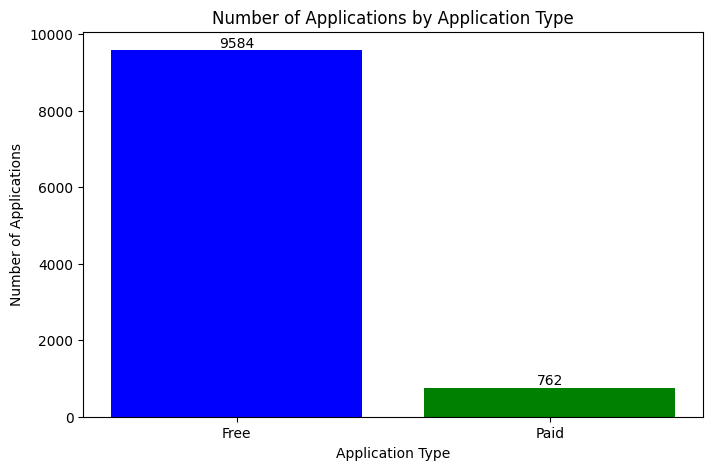

In [ ]:
plt.figure(figsize=(8, 5))
bars = plt.bar(type_counts.index, type_counts.values, color=['blue', 'green'])


plt.xlabel('Application Type')
plt.ylabel('Number of Applications')
plt.title('Number of Applications by Application Type')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()

** 2.What is the distribution of ratings by application type?**

In [ ]:
average_ratings = df.groupby('Type')['Rating'].mean()
average_ratings

,Rating
Type,
Free,4.198560
Paid,4.269291


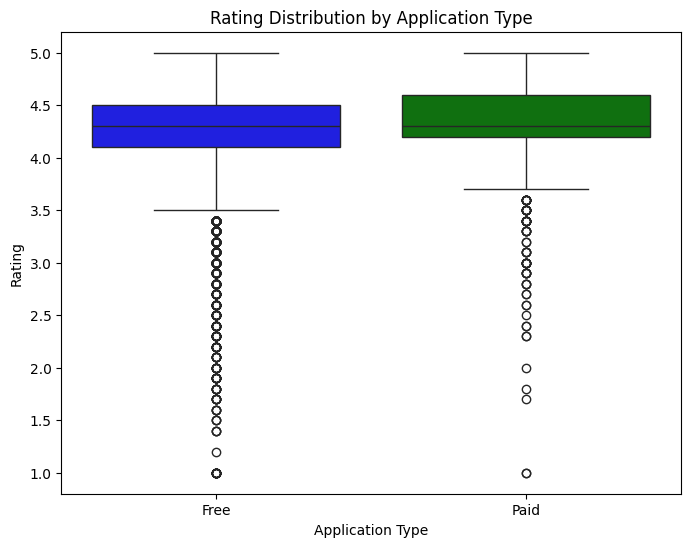

In [ ]:
plt.figure(figsize=(8, 6))

# Draw box plot and set colours with Seaborn library
sns.boxplot(x='Type', y='Rating', data=df, palette={"Free": "blue", "Paid": "green"}) # We can make whis=3

# Axis labels and title
plt.xlabel('Application Type')
plt.ylabel('Rating')
plt.title('Rating Distribution by Application Type')

# Show
plt.show()

**3.What are the ratings of categories and their number of Apps?**

In [ ]:
rating_counts = df['Rating'].value_counts().sort_index()

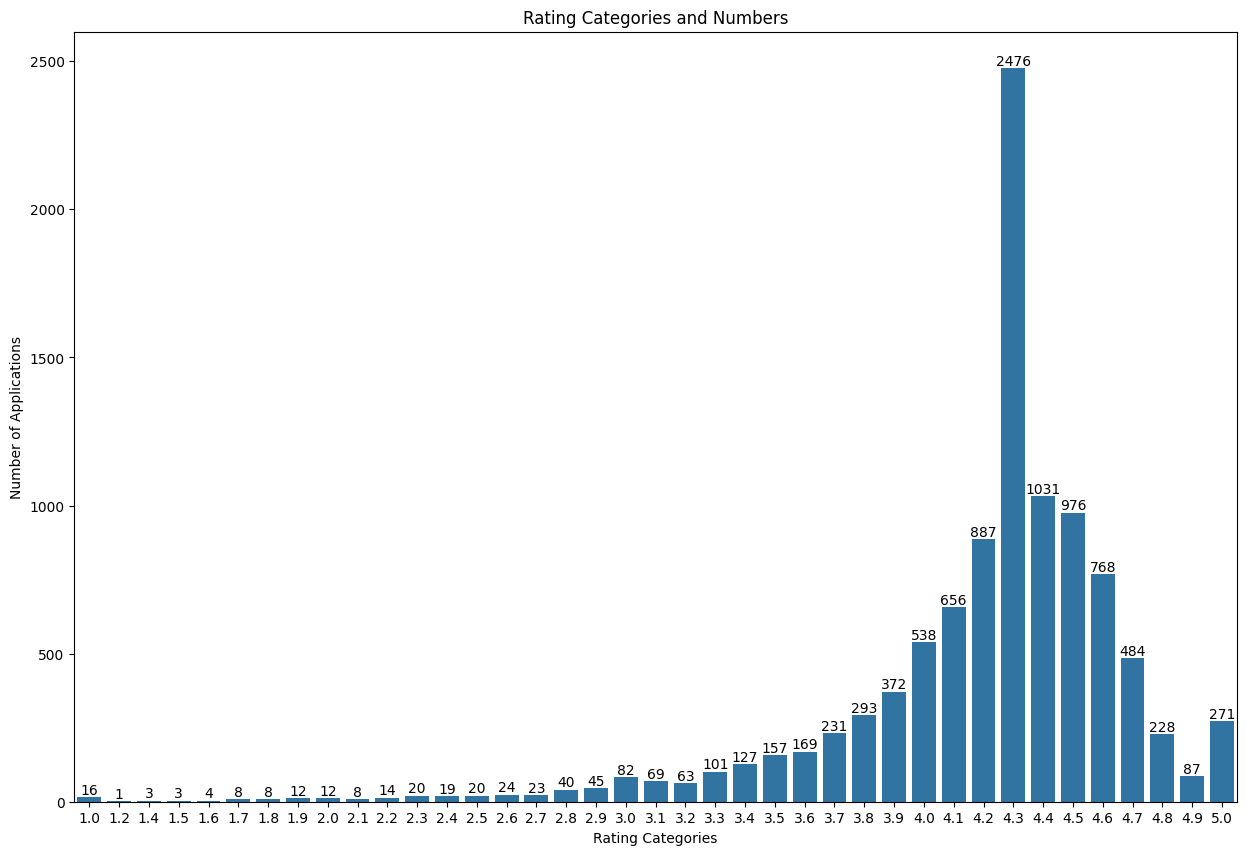

In [ ]:
# Adjust chart size
plt.figure(figsize=(15, 10))

# Draw vertical bar plot with Seaborn
ax = sns.countplot(x="Rating", data=df)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Rating Categories and Numbers")
plt.xlabel("Rating Categories")
plt.ylabel("Number of Applications")
plt.show()

**4.What are the content ratings and their number of Apps?**

In [ ]:
content_rating_counts = df['Content_Rating'].value_counts()
content_rating_counts

,count
Content_Rating,
Everyone,8372
Teen,1146
Mature 17+,447
Everyone 10+,376
Adults only 18+,3
Unrated,2


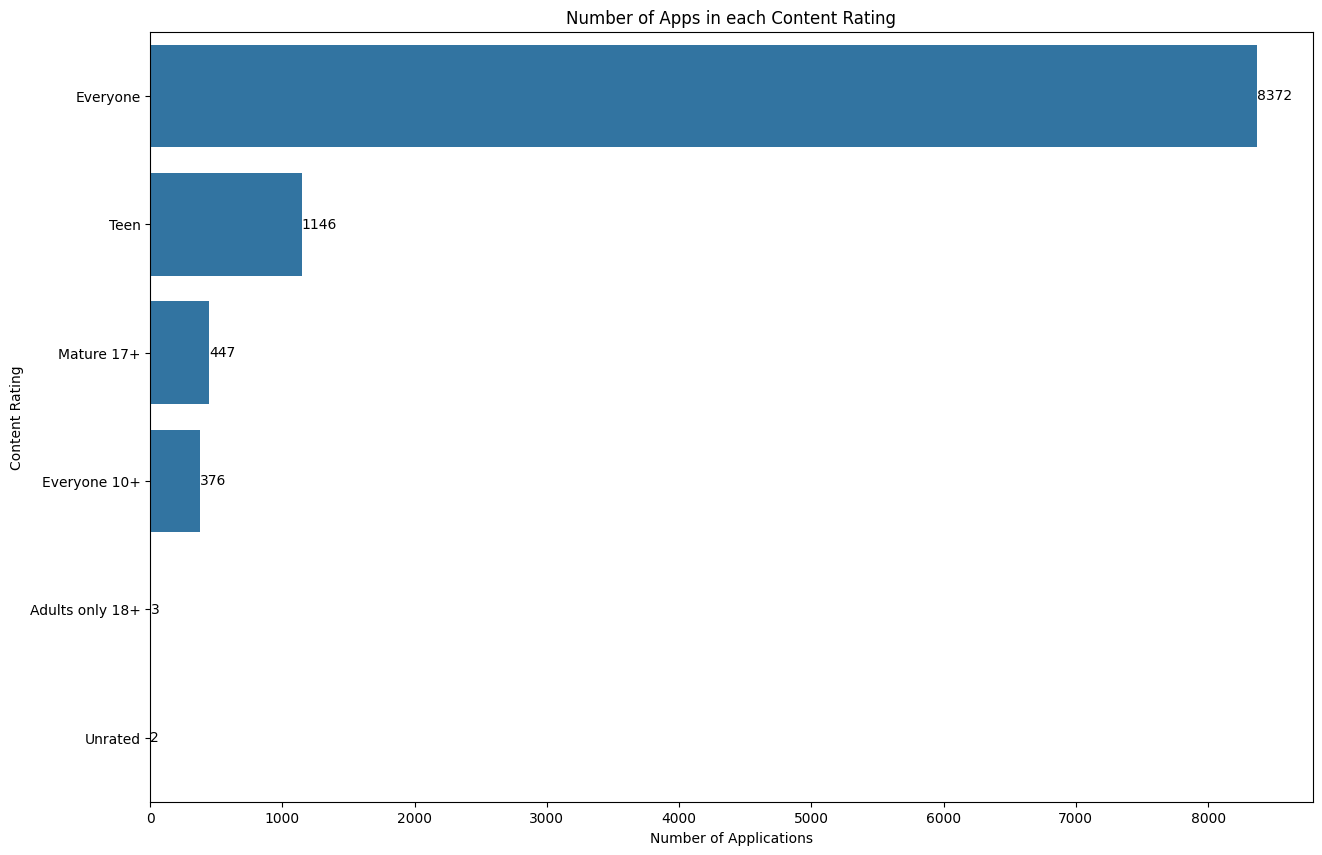

In [ ]:
plt.figure(figsize=(15, 10))

# Draw horizontal bar plot with Seaborn
ax = sns.countplot(y="Content_Rating", data=df, order = df['Content_Rating'].value_counts().index)

for container in ax.containers:
    ax.bar_label(container)

plt.title("Number of Apps in each Content Rating")
plt.xlabel("Number of Applications")
plt.ylabel("Content Rating")
plt.show()

**5.How Does Content Rating Affect User Ratings in Apps?**

In [ ]:
average_ratings_by_content = df.groupby('Content_Rating')['Rating'].mean()
average_ratings_by_content

,Rating
Content_Rating,
Adults only 18+,4.300000
Everyone,4.199164
Everyone 10+,4.256117
Mature 17+,4.138479
Teen,4.245462
Unrated,4.200000


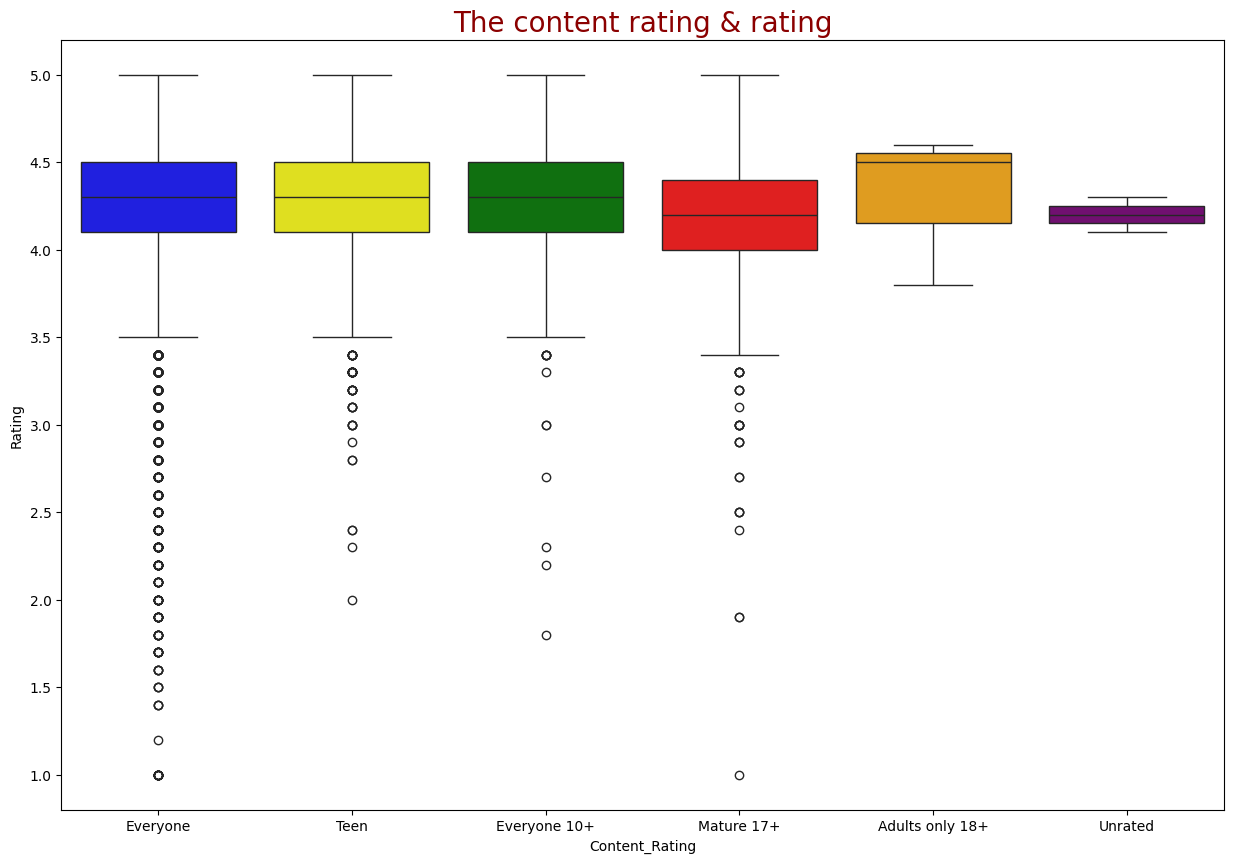

In [ ]:
plt.figure(figsize=(15, 10))

#
sns.boxplot(x="Content_Rating", y="Rating", data=df, palette={"Everyone": "blue",
                                                              "Teen": "yellow",
                                                              "Everyone 10+": "green",
                                                              "Mature 17+": "red",
                                                              "Adults only 18+": "orange",
                                                              "Unrated": "purple"})

plt.title("The content rating & rating", fontdict={'fontsize': 20, 'color': 'darkred'})
plt.show()


**6.What Is the Number of Applications in Each Category?**

In [ ]:
category_counts = df['Category'].value_counts()

In [ ]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

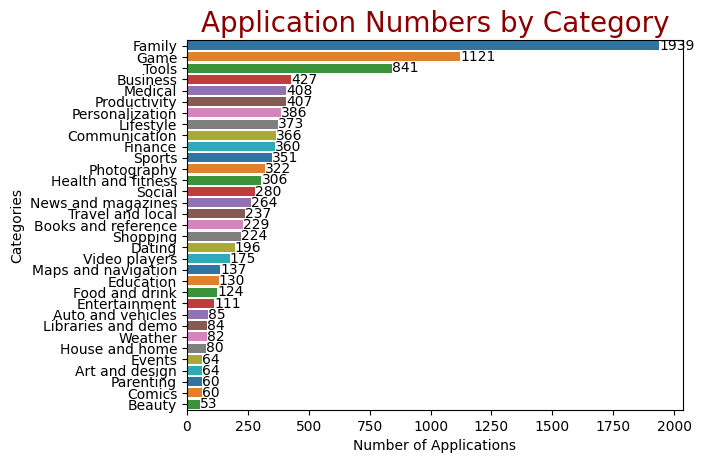

In [ ]:
ax = sns.countplot(y="Category", data=df, order=df['Category'].value_counts().index, palette='tab10')

for container in ax.containers:
    ax.bar_label(container)

plt.title("Application Numbers by Category", fontdict={'fontsize': 20, 'color': 'darkred'})
plt.xlabel("Number of Applications")
plt.ylabel("Categories")
plt.show()


**7.Which Categories Have the Highest Total Spending in Apps?**

In [ ]:
total_spending_by_category = df.groupby('Category')['Price'].sum().sort_values(ascending=False)

In [ ]:
top5_categories = total_spending_by_category.nlargest(5)
top5_categories

,Price
Category,
Finance,2900.83
Family,2419.83
Lifestyle,2360.87
Medical,1020.69
Game,287.30


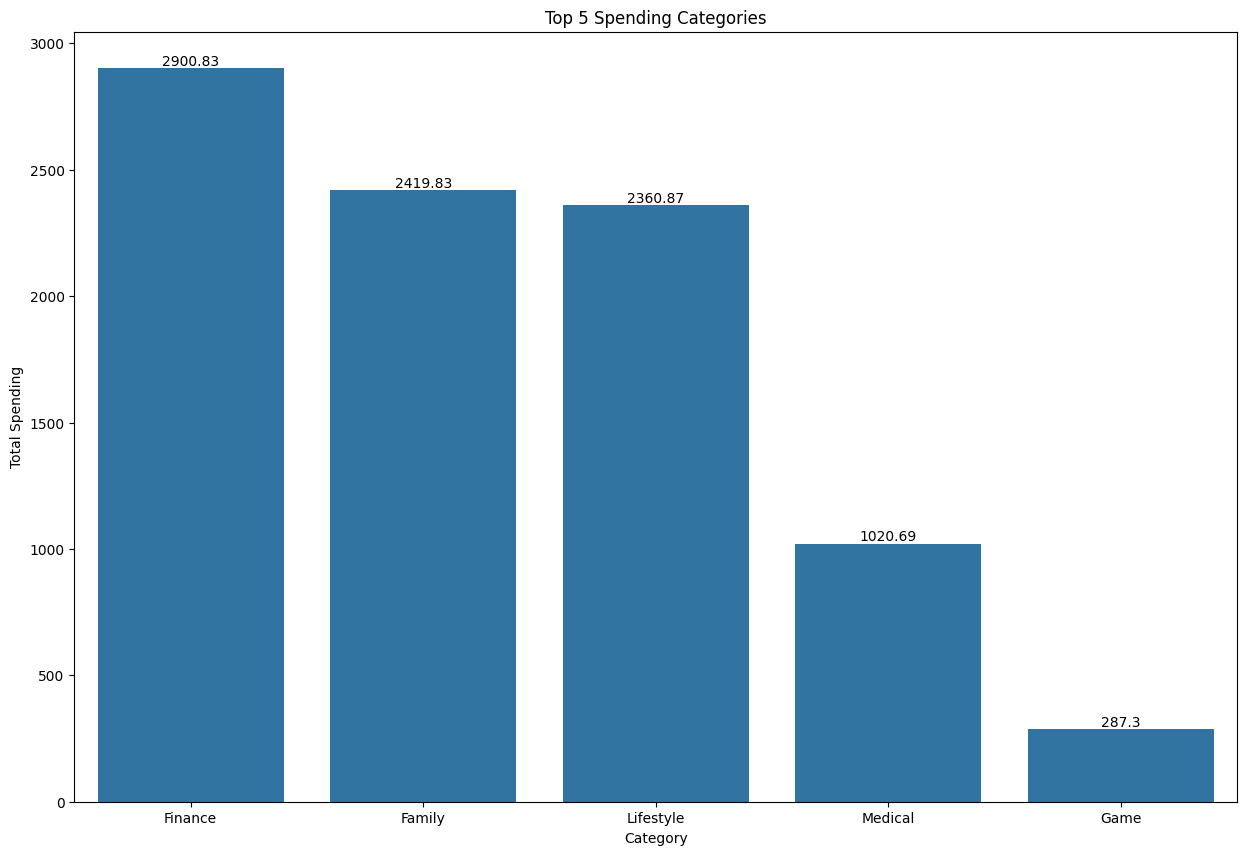

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=top5_categories.index, y=top5_categories.values, order=top5_categories.index)

plt.xlabel('Category')
plt.ylabel('Total Spending')
plt.title('Top 5 Spending Categories')

for container in ax.containers:
    ax.bar_label(container)
plt.show()

** 8.What Are the Most Common Words in the Names of Google Play Store Apps?**

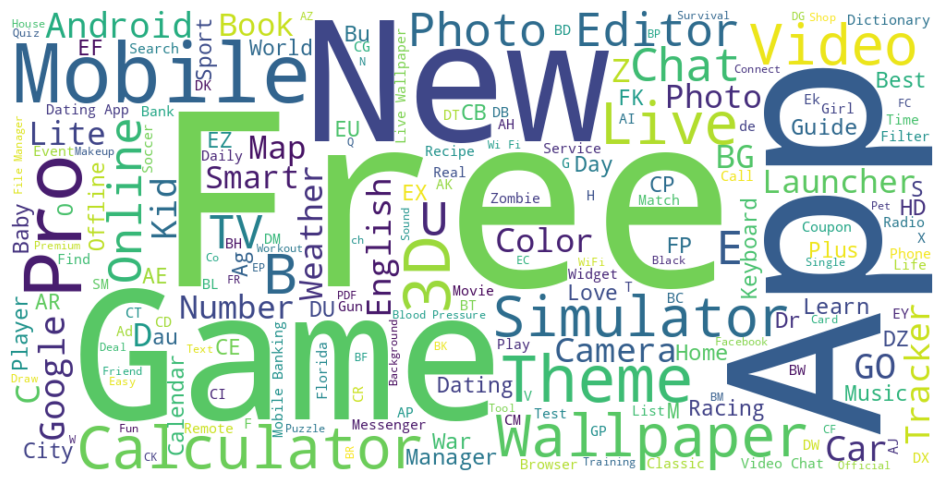

In [ ]:
text = ' '.join(df['App'])

wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**10.Which Categories Show Low Installs with High Ratings in Google Play Store?**

In [ ]:
low_competition_cat = df.groupby('Category')[['Rating', 'Installs']].agg({
    'Rating':
    'mean',
    'Installs':
    'sum'
}).sort_values(['Installs', 'Rating'], ascending=[True, False])

low_competition_cat['Installs'] = round(
    low_competition_cat['Installs'] / 1000000, 2)

low_competition_cat[:5]

,Rating,Installs
Category,,
Events,4.395313,15.97
Beauty,4.283019,27.20
Parenting,4.300000,31.52
Medical,4.212990,42.20
Auto and vehicles,4.205882,53.13


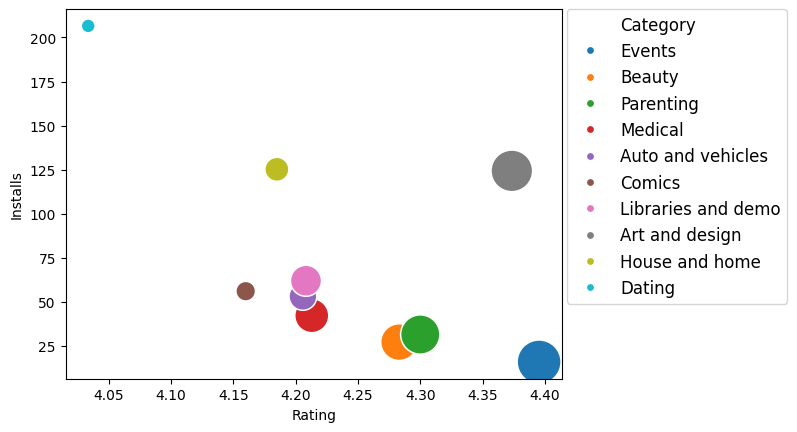

In [ ]:
ax = sns.scatterplot(data=low_competition_cat[:10], x='Rating',
                y='Installs', hue='Category', size='Rating', sizes=[s for s in range(100,1200,100)], legend=True)

h, l = ax.get_legend_handles_labels()

ax.legend(h[0:11], l[0:11], bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., fontsize=12)
plt.show()

**11.How Strong Is the Correlation Between Ratings and Number of Reviews for Apps?**

Correlation coff: 0.06347187197772504


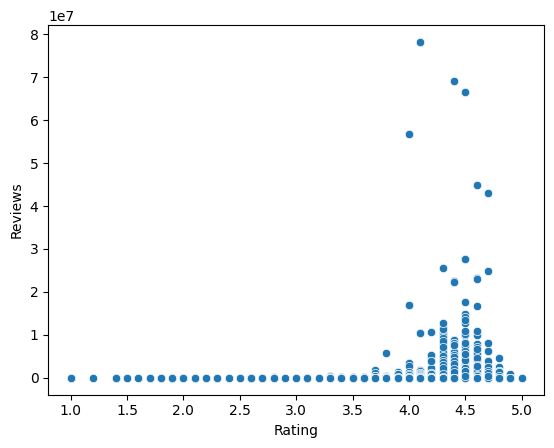

In [ ]:
sns.scatterplot(data=df, x='Rating', y='Reviews')

print('Correlation coff:', df['Reviews'].corr(df['Rating']))

**12.How Do Content Ratings Correlate with App Categories?**

In [ ]:
df['Content_Rating'].value_counts()

,count
Content_Rating,
Everyone,8372
Teen,1146
Mature 17+,447
Everyone 10+,376
Adults only 18+,3
Unrated,2


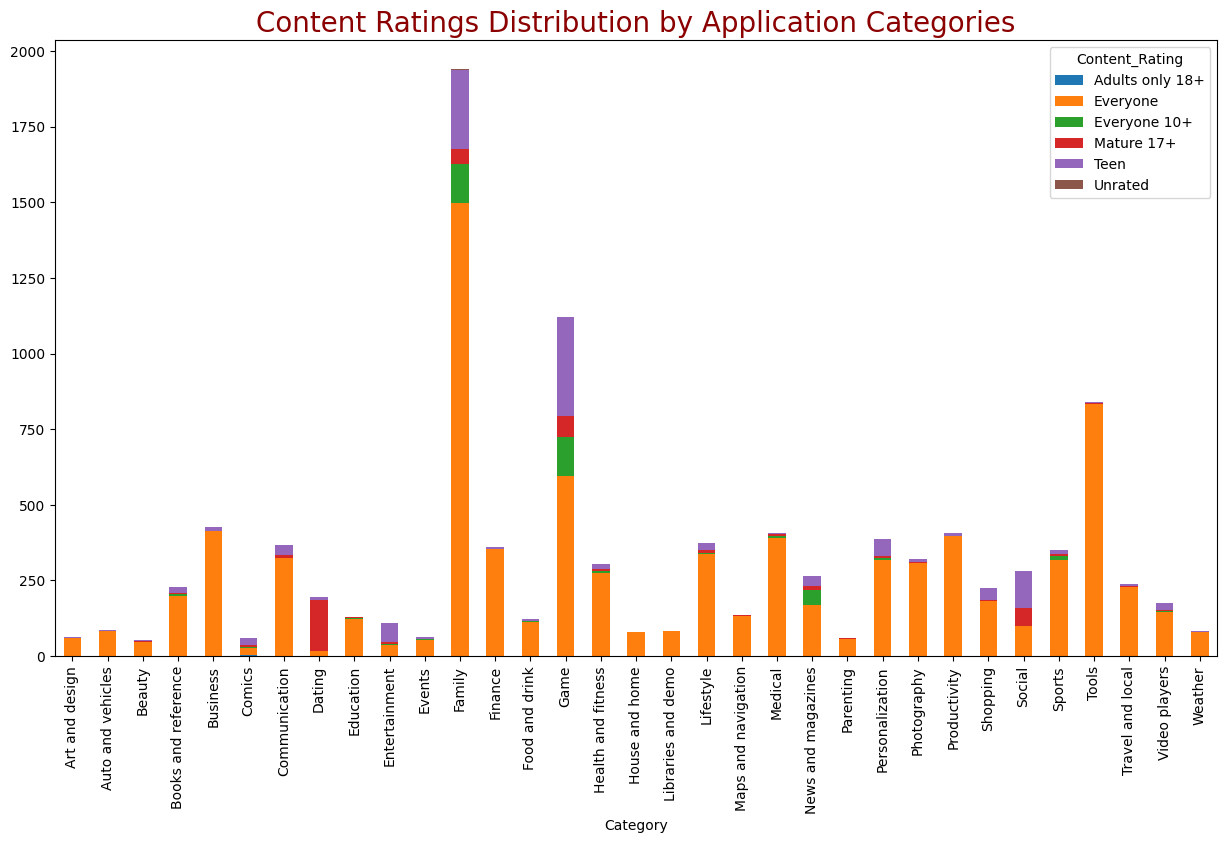

In [ ]:
content_category_cross = pd.crosstab( df['Category'], df['Content_Rating'])

content_category_cross.plot(kind='bar', stacked=True, figsize=(15,8))

plt.title("Content Ratings Distribution by Application Categories", fontdict={'fontsize': 20, 'color': 'darkred'});